In [1]:
import numpy as np
import tensorflow as tf
import logging
from matplotlib import pyplot as plt
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

-40.0 degrés Celsius = -40.0 degrés Fahrenheit
-10.0 degrés Celsius = 14.0 degrés Fahrenheit
0.0 degrés Celsius = 32.0 degrés Fahrenheit
8.0 degrés Celsius = 46.0 degrés Fahrenheit
10.0 degrés Celsius = 50.0 degrés Fahrenheit
15.0 degrés Celsius = 59.0 degrés Fahrenheit
22.0 degrés Celsius = 72.0 degrés Fahrenheit
30.0 degrés Celsius = 86.0 degrés Fahrenheit
38.0 degrés Celsius = 100.0 degrés Fahrenheit


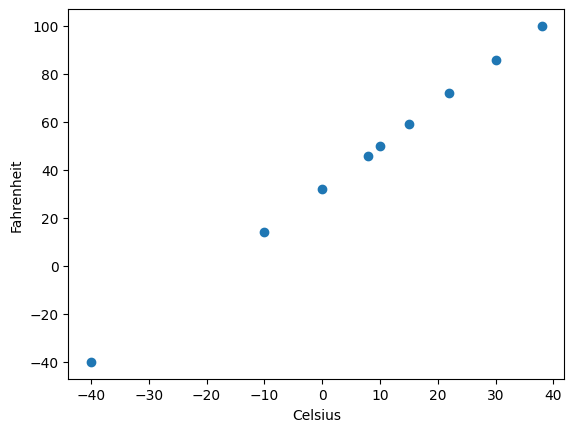

In [2]:
x_celsius    = np.array([-40, -10,  0,  8, 10, 15, 22, 30,  38],  dtype=float)
y_fahrenheit = np.array([-40,  14, 32, 46, 50, 59, 72, 86, 100],  dtype=float)

for i,c in enumerate(x_celsius):
  print("{} degrés Celsius = {} degrés Fahrenheit".format(c, y_fahrenheit[i]))


plt.xlabel('Celsius')
plt.ylabel("Fahrenheit")
plt.scatter(x_celsius, y_fahrenheit)


In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model = tf.keras.Sequential([l0])

In [5]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

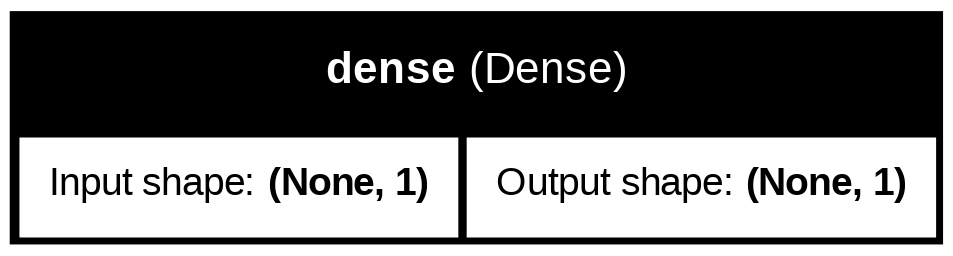

In [10]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
history = model.fit(x_celsius, y_fahrenheit, epochs=500, verbose=False)

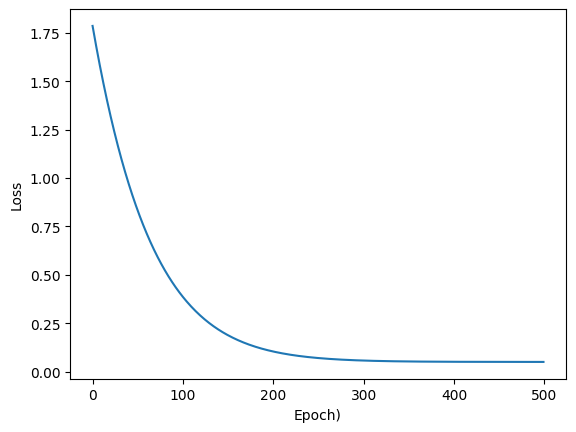

In [13]:
plt.xlabel("Epoch)")
plt.ylabel("Loss")
plt.plot(history.history['loss'])

In [16]:
model.predict(np.array([100.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[211.82486]], dtype=float32)

In [17]:
print("Parameters: {}".format(l0.get_weights()))

Parameters: [array([[1.7986609]], dtype=float32), array([31.958765], dtype=float32)]


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, input_shape=[1], activation='relu', name='input_layer'),
    tf.keras.layers.Dense(units=16, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dense(units=16, activation='relu', name='hidden_layer_2'),
    tf.keras.layers.Dense(units=16, activation='relu', name='hidden_layer_3'),
    tf.keras.layers.Dense(units=8, activation='relu', name='hidden_layer_4'),
    tf.keras.layers.Dense(units=1, name='output_layer')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [22]:
history = model.fit(x_celsius, y_fahrenheit, epochs=500, verbose=False)

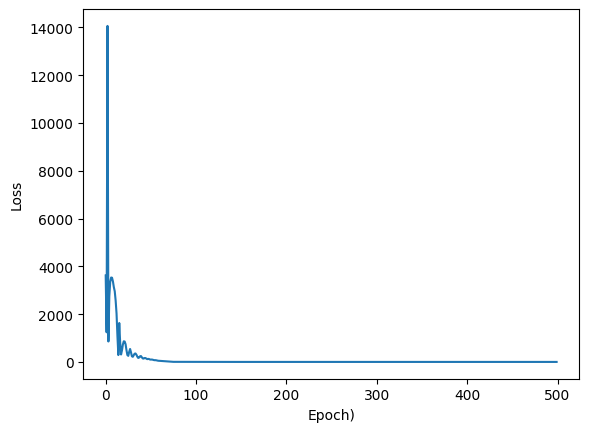

In [23]:
plt.xlabel("Epoch)")
plt.ylabel("Loss")
plt.plot(history.history['loss'])